In [294]:

import pandas as pd
import geopandas as gpd
import hvplot.pandas
import holoviews as hv
from bokeh.io import export_png
from pathlib import Path
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress

In [295]:
# Create 'output_data' directory if it doesn't exist
output_dir = "../traffic_output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [296]:
''' Traffic_Count_Locations.geojson 
 https://vicdata.vicroads.vic.gov.au/metadata/Traffic_Count_Locations%20-%20Open%20Data.html
 license - 	Creative Commons Attribution 4.0 International
 This dataset contains the location, GPS coordinates and textural description, of all traffic counts conducted by VicRoads over the past 20+ years. VicRoads collects thousands of counts each year across the state. Depending on the type of equipment used, this will determine the accuracy and the type of data collected. eg Data collected at Traffic Lights (SCATS) does not classify the data into cars and truck. Turning Movement data does not have a traffic speed component etc. Data is not collected at every location every year. Some Traffic flow movements (TFMs) have also been used for adhoc counts. A strategic counting program has been developed to ensure an even coverage of data is available both temporally and spatially based on value to the state. 
'''

# AustraliaPlaces.zip
# https://www.peter-johnson.com.au/AustraliaPlaces

geojson_path = Path('../dataset/Traffic_Count_Locations.geojson')

gdf = gpd.read_file(geojson_path)
gdf.head(5)

,OBJECTID,TFM_ID,TFM_LRS_ID,TFM_DESC,TFM_TYP_DE,MOVEMENT_T,SITE_DESC,ROAD_NBR,DECLARED_R,LOCAL_ROAD,...,AADT_TRUCK,PER_TRUCKS,HF_NUMBER,HLINK_NUMB,HF_ROUTE,HF_ROUTE_D,HF_DESCRIP,HF_SEQUENC,RAMP_TYPE,geometry
0,1,14304,36573,PUNT RD N OF ROWENA PDE,INTERSECTION,All Moves,PUNT RD/ROWENA PDE,2080,HODDLE HIGHWAY,PUNT ROAD,...,NaN,NaN,218,1514,2,1,PUNT RD S BD BTWN BRIDGE RD & BRUNTON AVE,13.0,ROAD,POINT (144.98965 -37.81984)
1,2,14912,36606,BLACKBURN RD N OF ANDERSONS CREEK RD,INTERSECTION,All Moves,BLACKBURN RD/ANDERSONS CREEK RD,5307,BLACKBURN ROAD,BLACKBURN ROAD,...,NaN,NaN,2732,3938,312,1,BLACKBURN RD S BD BTWN KING ST & ANDERSONS CRE...,1.0,ROAD,POINT (145.16413 -37.77695)
2,3,58602,36510,BENDIGO-MARYBOROUGH RD SW BD BTW MARYBOROUGH-D...,MIDBLOCK,All Moves,BENDIGO-MARYBOROUGH RD NBTW MARYBOROUGH-DUNOLL...,5200,BENDIGO-MARYBOROUGH ROAD,MARYBOROUGH-DUNOLLY ROAD,...,80.0,0.16,9913,3580,498,1,MARYBOROUGH-BENDIGO ROAD S Bd btwn MARYBOROUGH...,7.0,ROAD,POINT (143.76271 -36.99559)
3,4,860,36609,DORSET_RD N of CANTERBURY_RD,INTERSECTION,Left Missing,DORSET RD/CANTERBURY RD,5784,DORSET ROAD,DORSET ROAD,...,NaN,NaN,3520,5282,388,1,DORSET RD S BD BTWN EASTFIELD RD & CANTERBURY RD,7.0,ROAD,POINT (145.28760 -37.82563)
4,5,2565,36543,SYDNEY RD N OF JUKES RD,INTERSECTION,All Moves,SYDNEY RD/JUKES RD,5500,COBURG-CRAIGIEBURN ROAD,SYDNEY ROAD,...,NaN,NaN,12817,6626,1620,1,SYDNEY RD S BD BTWN METROPOLITAN RING RD & BOX...,93.0,ROAD,POINT (144.96006 -37.70073)


In [297]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64276 entries, 0 to 64275
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    64276 non-null  int64   
 1   TFM_ID      64276 non-null  int64   
 2   TFM_LRS_ID  64276 non-null  object  
 3   TFM_DESC    64276 non-null  object  
 4   TFM_TYP_DE  64276 non-null  object  
 5   MOVEMENT_T  64276 non-null  object  
 6   SITE_DESC   64276 non-null  object  
 7   ROAD_NBR    64276 non-null  int64   
 8   DECLARED_R  64276 non-null  object  
 9   LOCAL_ROAD  64276 non-null  object  
 10  DATA_SRC_C  64276 non-null  object  
 11  YEAR_SINCE  23972 non-null  float64 
 12  LAST_YEAR   23972 non-null  float64 
 13  DATA_SOURC  64276 non-null  object  
 14  TIME_CATEG  64276 non-null  object  
 15  AADT_ALLVE  23083 non-null  float64 
 16  AADT_TRUCK  13568 non-null  float64 
 17  PER_TRUCKS  13562 non-null  float64 
 18  HF_NUMBER   64276 non-null  int64   
 

In [298]:
gdf.count()

OBJECTID      64276
TFM_ID        64276
TFM_LRS_ID    64276
TFM_DESC      64276
TFM_TYP_DE    64276
MOVEMENT_T    64276
SITE_DESC     64276
ROAD_NBR      64276
DECLARED_R    64276
LOCAL_ROAD    64276
DATA_SRC_C    64276
YEAR_SINCE    23972
LAST_YEAR     23972
DATA_SOURC    64276
TIME_CATEG    64276
AADT_ALLVE    23083
AADT_TRUCK    13568
PER_TRUCKS    13562
HF_NUMBER     64276
HLINK_NUMB    64276
HF_ROUTE      64276
HF_ROUTE_D    64276
HF_DESCRIP    64276
HF_SEQUENC    64276
RAMP_TYPE     64276
geometry      64276
dtype: int64

In [299]:
# Plot initial dataset with traffic count
plot = gdf.hvplot.points(
    x='X', y='Y', 
    geo=True, 
    tiles='EsriImagery',
    frame_width=700, frame_height=500, 
)
plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [X,Y]

In [300]:
hvplot.save(plot, f'{output_dir}/initial-traffic-count.html')
# hvplot.save(plot, f'{output_dir}/initial-traffic-count.png')

In [301]:
# Create pandas dataset with select columns 
# YEAR_SINCE 	Number 	  	The number of years since the latest count occurred. 
# AADT_ALLVE 	Number 	  	The annual average daily traffic volume for all vehicles (yearly volume for all vehicles divided by 365) for the last year counted. 
# LAST_YEAR 	Number 	  	The last year where traffic count was conducted 
# TFM_ID 	Number 	  	TIS_SURROGATE_ID. Traffic flow movement ID (TFM_ID) is used in LRS for joining on the spatial dataset. 
# SHAPE 	Text 	  	Geometry data type 
selected_columns = ['geometry', 'YEAR_SINCE', 'LAST_YEAR', 'AADT_ALLVE'] 

# Leave only from 2017 and up to year 2019
gdf = gdf[gdf['LAST_YEAR'] <= 2019]
gdf = gdf[gdf['LAST_YEAR'] >= 2017]


In [302]:
gdf.count()

OBJECTID      2519
TFM_ID        2519
TFM_LRS_ID    2519
TFM_DESC      2519
TFM_TYP_DE    2519
MOVEMENT_T    2519
SITE_DESC     2519
ROAD_NBR      2519
DECLARED_R    2519
LOCAL_ROAD    2519
DATA_SRC_C    2519
YEAR_SINCE    2519
LAST_YEAR     2519
DATA_SOURC    2519
TIME_CATEG    2519
AADT_ALLVE    2324
AADT_TRUCK    1737
PER_TRUCKS    1734
HF_NUMBER     2519
HLINK_NUMB    2519
HF_ROUTE      2519
HF_ROUTE_D    2519
HF_DESCRIP    2519
HF_SEQUENC    2519
RAMP_TYPE     2519
geometry      2519
dtype: int64

In [303]:
gdf.head()

,OBJECTID,TFM_ID,TFM_LRS_ID,TFM_DESC,TFM_TYP_DE,MOVEMENT_T,SITE_DESC,ROAD_NBR,DECLARED_R,LOCAL_ROAD,...,AADT_TRUCK,PER_TRUCKS,HF_NUMBER,HLINK_NUMB,HF_ROUTE,HF_ROUTE_D,HF_DESCRIP,HF_SEQUENC,RAMP_TYPE,geometry
14,15,261,36387,WESTERN FWY E BD 570M W OF WINDERMERE-LEARMONTH,MIDBLOCK,All Moves,WESTERN FWY 570M W OF WINDERMERE-LEARMONTH,2520,WESTERN FREEWAY,WESTERN HIGHWAY,...,830.0,0.25,346,346,9,0,WESTERN FWY E BD BTWN WESTERN HWY/BALLARAT-BUR...,43.0,ROAD,POINT (143.72348 -37.48093)
55,56,53642,97023,STH_GIPPSLAND_HWY SE OF SLADEN_ST,INTERSECTION,Left Missing,SOUTH GIPPSLAND HWY/SLADEN ST/HIGH ST,2580,SOUTH GIPPSLAND HIGHWAY,SOUTH GIPPSLAND HIGHWAY,...,NaN,NaN,8265,671,844,1,SOUTH GIPPSLAND HWY N BD BTWN CAMERON STREET &...,60.0,ROAD,POINT (145.28331 -38.11399)
58,59,54052,99279,BELGRAVE-HALLAM RD N BD S OF DEVIATION RD,MIDBLOCK,All Moves,BELGRAVE-HALLAM RD S OF DEVIATION RD,5773,BELGRAVE-HALLAM ROAD,BELGRAVE-HALLAM ROAD,...,240.0,0.05,11172,5206,385,0,BELGRAVE-HALLAM RD N BD BTWN WELLINGTON RD & T...,3.0,ROAD,POINT (145.35727 -37.93783)
98,99,1469,36699,TYERS RD E BD BTW BREED ST & BYRON ST,MIDBLOCK,All Moves,TYERS RD BTW BREED ST & BYRON ST,5540,TYERS ROAD,GREY STREET,...,380.0,0.09,3235,4585,353,0,GREY STREET E Bd btwn TYERS ROAD & ARGYLE STREET,3.0,ROAD,POINT (146.52405 -38.19208)
108,109,58720,36624,FITZSIMONS LA SB BTW SUMMERHILL RD & KIWANIS LN,MIDBLOCK,All Moves,FITZSIMONS LA BTW SUMMERHILL RD & KIWANIS LN,5901,DONCASTER-ELTHAM ROAD,FITZSIMONS LANE,...,NaN,NaN,4625,5976,1037,1,FITZSIMONS LANE S BD BTWN MAIN RD & PORTER ST,1.0,ROAD,POINT (145.13647 -37.74395)


In [304]:
def open_localities():
    # https://www.peter-johnson.com.au/AustraliaPlaces
    tab_file_path = '../dataset/AustraliaPlaces/AustraliaPlaces.csv'
    localities = pd.read_csv(tab_file_path)
    # Give names to columns
    localities.columns = ['town_name', 'state', 'latitude', 'longitude']
    return localities

localities = open_localities()
print(localities.head())

     town_name state   latitude   longitude
0   Abbotsford   NaN -33.850553  151.129759
1   Abbotsford   VIC -37.804551  144.998854
2  Abercrombie   NaN -33.391026  149.555627
3     Aberdare   NaN -32.842775  151.380274
4     Aberdeen   NaN -32.169125  150.894618


In [305]:

# Convert the Pandas DataFrame to a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(localities['longitude'], localities['latitude'])]
geo_localities = gpd.GeoDataFrame(localities, geometry=geometry, crs='EPSG:4326')

# Reproject both GeoDataFrames to a projected CRS (e.g., EPSG:3857)
gdf_projected = gdf.to_crs(epsg=3857)
geo_localities_projected = geo_localities.to_crs(epsg=3857)

# Create nearest dataset which will have the locality names closest to the geo points
nearest = gpd.sjoin_nearest(gdf_projected, geo_localities_projected, how='left', max_distance=None, lsuffix='gdf', rsuffix='df')
selected_columns = ['town_name', 'AADT_ALLVE', 'longitude', 'latitude']
#nearest = nearest[selected_columns].dropna()

print(nearest.shape[0])


2519


In [306]:
nearest_clean = nearest.groupby('town_name', as_index=False).agg({
    'AADT_ALLVE': 'sum',       # Sum the counts for duplicate city names
    'town_name': 'first',
    'longitude': 'first',
    'latitude': 'first'  
})
print(nearest_clean.head(5))
print(type(nearest_clean))

   AADT_ALLVE     town_name   longitude   latitude
0     44200.0    Abbotsford  144.998854 -37.804551
1     42000.0    Aberfeldie  144.897457 -37.759620
2      4600.0  Aireys Inlet  144.106755 -38.462089
3         0.0  Airport West  144.883494 -37.722258
4     92100.0   Albert Park  144.957105 -37.845206
<class 'pandas.core.frame.DataFrame'>


In [307]:
map_plot = nearest_clean.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    legend='right',
    c='town_name', 
    cmap='Category10',
    hover_cols=['town_name', 'AADT_ALLVE']
)

# Display the map
map_plot
hvplot.save(map_plot, f'{output_dir}/traffic-count-with-names.html')

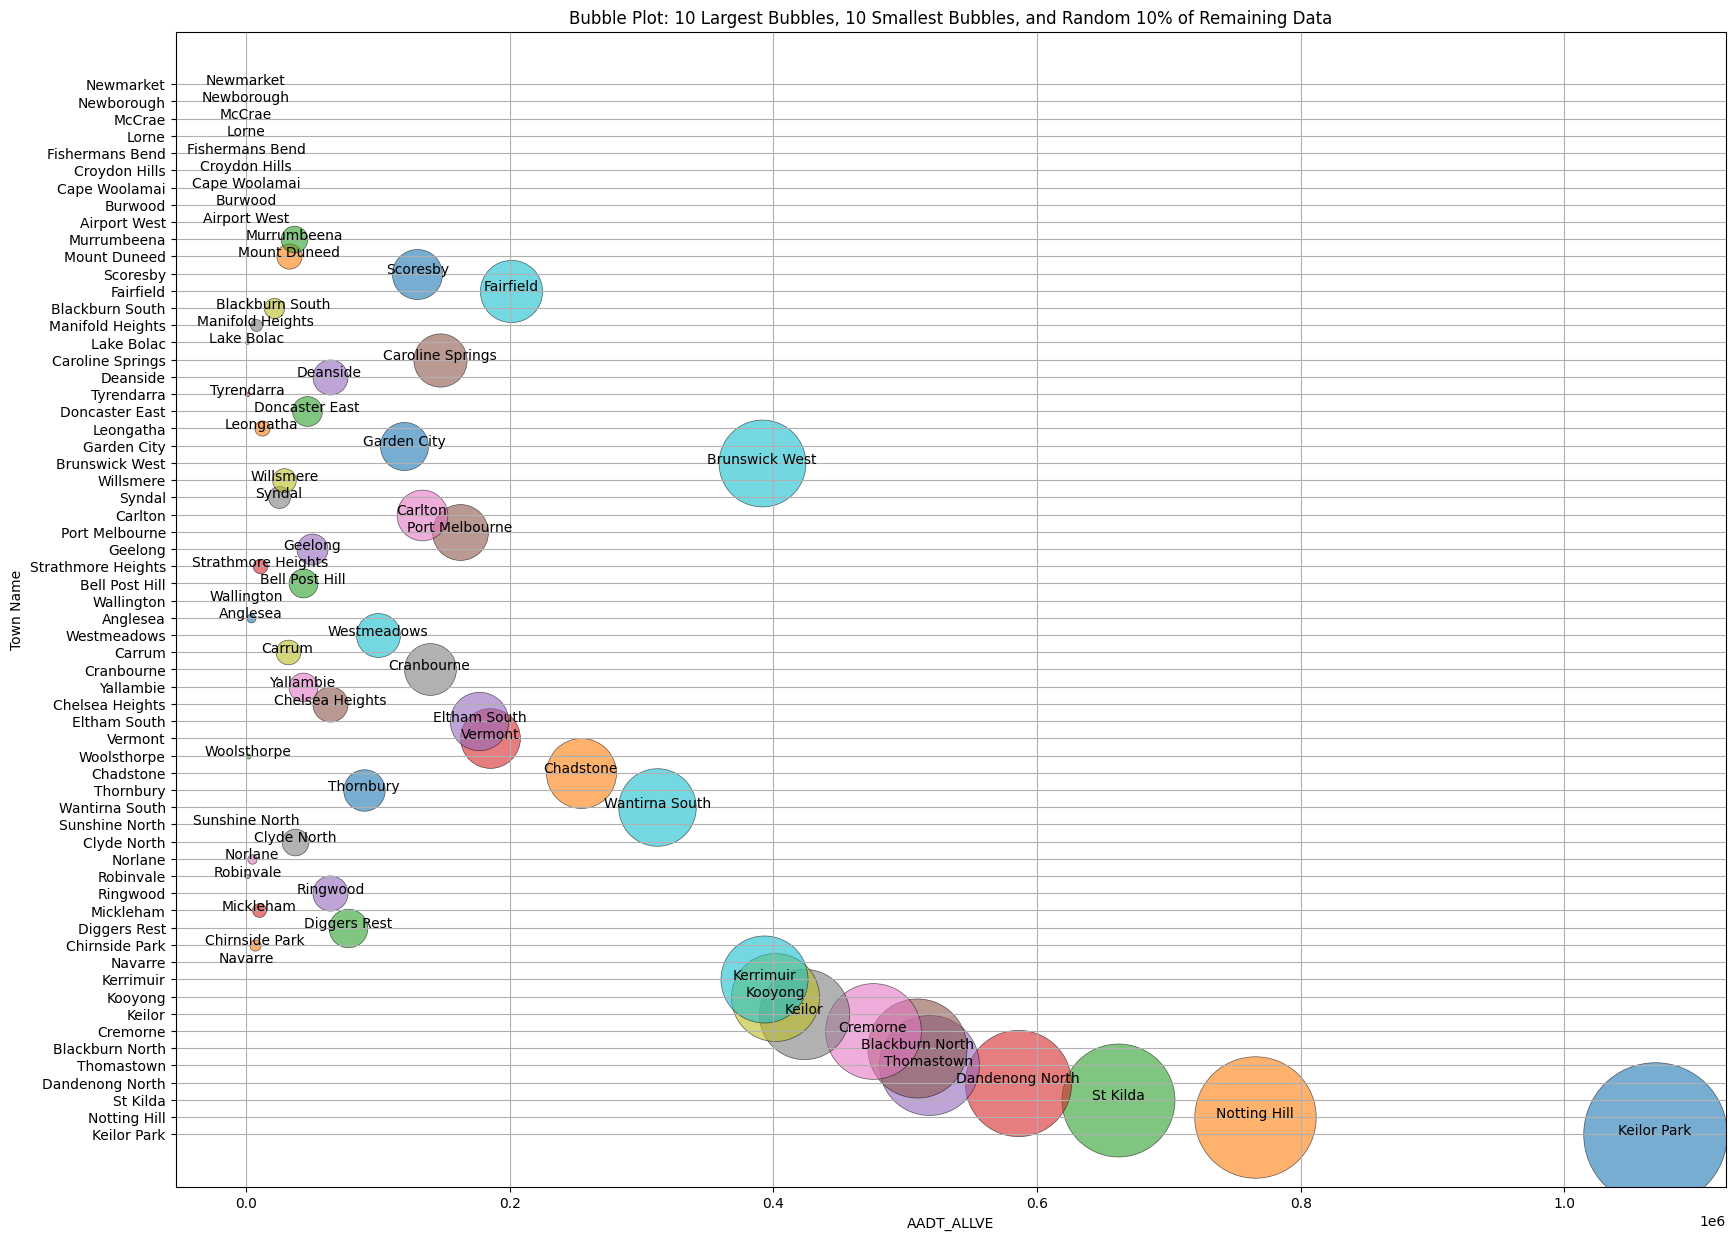

In [308]:
# plot 10 biggest bubbles + randomly plot only 10% of remaining data  + 10 smallest

# Step 1: Select the 10 largest bubbles
largest_bubbles = nearest_clean.nlargest(10, 'AADT_ALLVE')

# Step 2: Identify remaining data and randomly sample 10% of it
remaining_data = nearest_clean[~nearest_clean.index.isin(largest_bubbles.index)]
sample_size = max(1, int(len(remaining_data) * 0.1))  # Ensure at least one row is selected
sampled_remaining = remaining_data.sample(n=sample_size, random_state=42)  # Randomly sample

# Step 3: Select the 10 smallest bubbles
smallest_bubbles = nearest_clean.nsmallest(10, 'AADT_ALLVE')

# Step 4: Combine all three datasets for plotting
combined_data = pd.concat([largest_bubbles, sampled_remaining, smallest_bubbles]).drop_duplicates()

# Plotting the bubble plot
plt.figure(figsize=(20, 15))

# Create the bubble plot for combined data
for i, row in combined_data.iterrows():
    bubble_size = row['AADT_ALLVE'] / 100  # Scale size for visibility
    plt.scatter(row['AADT_ALLVE'], row['town_name'], 
                s=bubble_size, alpha=0.6, edgecolor='k', linewidth=0.5)
    
    # Display town name next to the bubble
    plt.text(row['AADT_ALLVE'], row['town_name'], row['town_name'], 
             fontsize=10, ha='center')

# Customize the plot
plt.title('Bubble Plot: 10 Largest Bubbles, 10 Smallest Bubbles, and Random 10% of Remaining Data')
plt.xlabel('AADT_ALLVE')
plt.ylabel('Town Name')
plt.grid(True)
plt.savefig(f'{output_dir}/traffic-count-per-locations.png')

In [309]:
largest_entries = nearest_clean.nlargest(10, 'AADT_ALLVE')
print(largest_entries)

     AADT_ALLVE        town_name   longitude   latitude
210   1068700.0      Keilor Park  144.850172 -37.718725
301    765000.0     Notting Hill  145.145562 -37.905582
366    661500.0         St Kilda  144.981637 -37.863826
105    585500.0  Dandenong North  145.214323 -37.955832
387    518000.0       Thomastown  145.008110 -37.683267
39     509000.0  Blackburn North  145.154324 -37.805380
98     475500.0         Cremorne  144.992773 -37.829023
206    423000.0           Keilor  144.825070 -37.711354
221    401500.0          Kooyong  145.035840 -37.841394
213    393000.0        Kerrimuir  145.137212 -37.805658


In [310]:
non_zero = nearest_clean[nearest_clean['AADT_ALLVE'] > 0]
smallest_entries = non_zero.nsmallest(10, 'AADT_ALLVE')
print(smallest_entries)

     AADT_ALLVE     town_name   longitude   latitude
168       210.0    Goughs Bay  146.066707 -37.186132
364       220.0     St Arnaud  143.255393 -36.614998
181       500.0  Harrietville  147.063870 -36.892317
433       580.0  Wonboyn Lake  149.912558 -37.250783
319       670.0      Pinnaroo  140.906607 -35.258606
328       690.0  Pyramid Hill  144.115593 -36.054399
225       770.0    Lake Bolac  142.838586 -37.710695
412       770.0     Warburton  145.688727 -37.753622
297       780.0        Noojee  146.000117 -37.893349
259       830.0       Merbein  142.058148 -34.167621


In [311]:
# Read ambulance data for 2019
amb_df = pd.read_csv("../Data/ambulance2019.csv")
amb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UCL Name             85 non-null     object
 1   Final Dispatch Code  79 non-null     object
 2   %<=15mins            39 non-null     object
 3   AVG RT - Seconds     79 non-null     object
 4   Total Number         79 non-null     object
dtypes: object(5)
memory usage: 3.7+ KB


In [312]:
amb_df.head(5)

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number
0,Albury - Wodonga (Wodonga Part),Code 1,90.9%,604,"2,050"
1,Bacchus Marsh,Code 1,83.4%,643,835
2,Bairnsdale,Code 1,84.1%,654,"1,021"
3,Ballarat,Code 1,91.2%,604,"5,785"
4,Benalla,Code 1,76.4%,752,592


In [313]:
#Normalize the town names (convert to lowercase and strip spaces)
nearest_clean['town_name_clean'] = nearest_clean['town_name'].str.lower().str.strip()
amb_df['UCL Name_clean'] = amb_df['UCL Name'].str.lower().str.strip()

nearest_clean = nearest_clean.dropna()
amb_df = amb_df.dropna()

In [314]:
def find_common_name(name, name_list):
    for n in name_list:
        # Check if one is a substring of the other
        if name in n or n in name:  
            return n
    # Return original name if no match found
    return name 

nearest_clean['town_name_clean'] = nearest_clean['town_name_clean'].apply(lambda x: find_common_name(x, amb_df['UCL Name_clean'])) 

In [315]:
merged_df = pd.merge(
    nearest_clean, 
    amb_df, 
    left_on='town_name_clean', 
    right_on='UCL Name_clean', 
    how='inner'
)
merged_df['town_name'] = merged_df['town_name']  # Or you can rename it to 'town_name'
merged_df = merged_df.drop(columns=['town_name_clean', 'UCL Name', 'UCL Name_clean'])
merged_df = merged_df.dropna()

merged_df['AVG RT - Seconds'] = pd.to_numeric(amb_df['AVG RT - Seconds'], errors='coerce')
#merged_df['%<=15mins'] = pd.to_numeric(amb_df['%<=15mins'], errors='coerce')

merged_df = merged_df[merged_df['AADT_ALLVE'] != 0]
merged_df = merged_df[merged_df['AVG RT - Seconds'] != 0]
merged_df['AADT_ALLVE'] = merged_df['AADT_ALLVE'].astype(int)
merged_df['AVG RT - Seconds'] = merged_df['AVG RT - Seconds'].astype(int)
merged_df = merged_df.drop_duplicates(subset='town_name')
merged_df.info()
merged_df.count()
merged_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 29
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AADT_ALLVE           28 non-null     int32  
 1   town_name            28 non-null     object 
 2   longitude            28 non-null     float64
 3   latitude             28 non-null     float64
 4   Final Dispatch Code  28 non-null     object 
 5   %<=15mins            28 non-null     object 
 6   AVG RT - Seconds     28 non-null     int32  
 7   Total Number         28 non-null     object 
dtypes: float64(2), int32(2), object(4)
memory usage: 1.8+ KB


,AADT_ALLVE,town_name,longitude,latitude,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number
0,19000,Albury,146.916280,-36.080477,Code 1,90.9%,604,"2,050"
1,42350,Bairnsdale,147.630475,-37.825451,Code 1,84.1%,643,"1,021"
2,6700,Benalla,145.988352,-36.548971,Code 1,76.4%,654,592
3,164500,Bendigo,144.282593,-36.758877,Code 1,87.4%,604,"5,567"
4,8400,Colac,143.585854,-38.339977,Code 1,86.2%,752,607


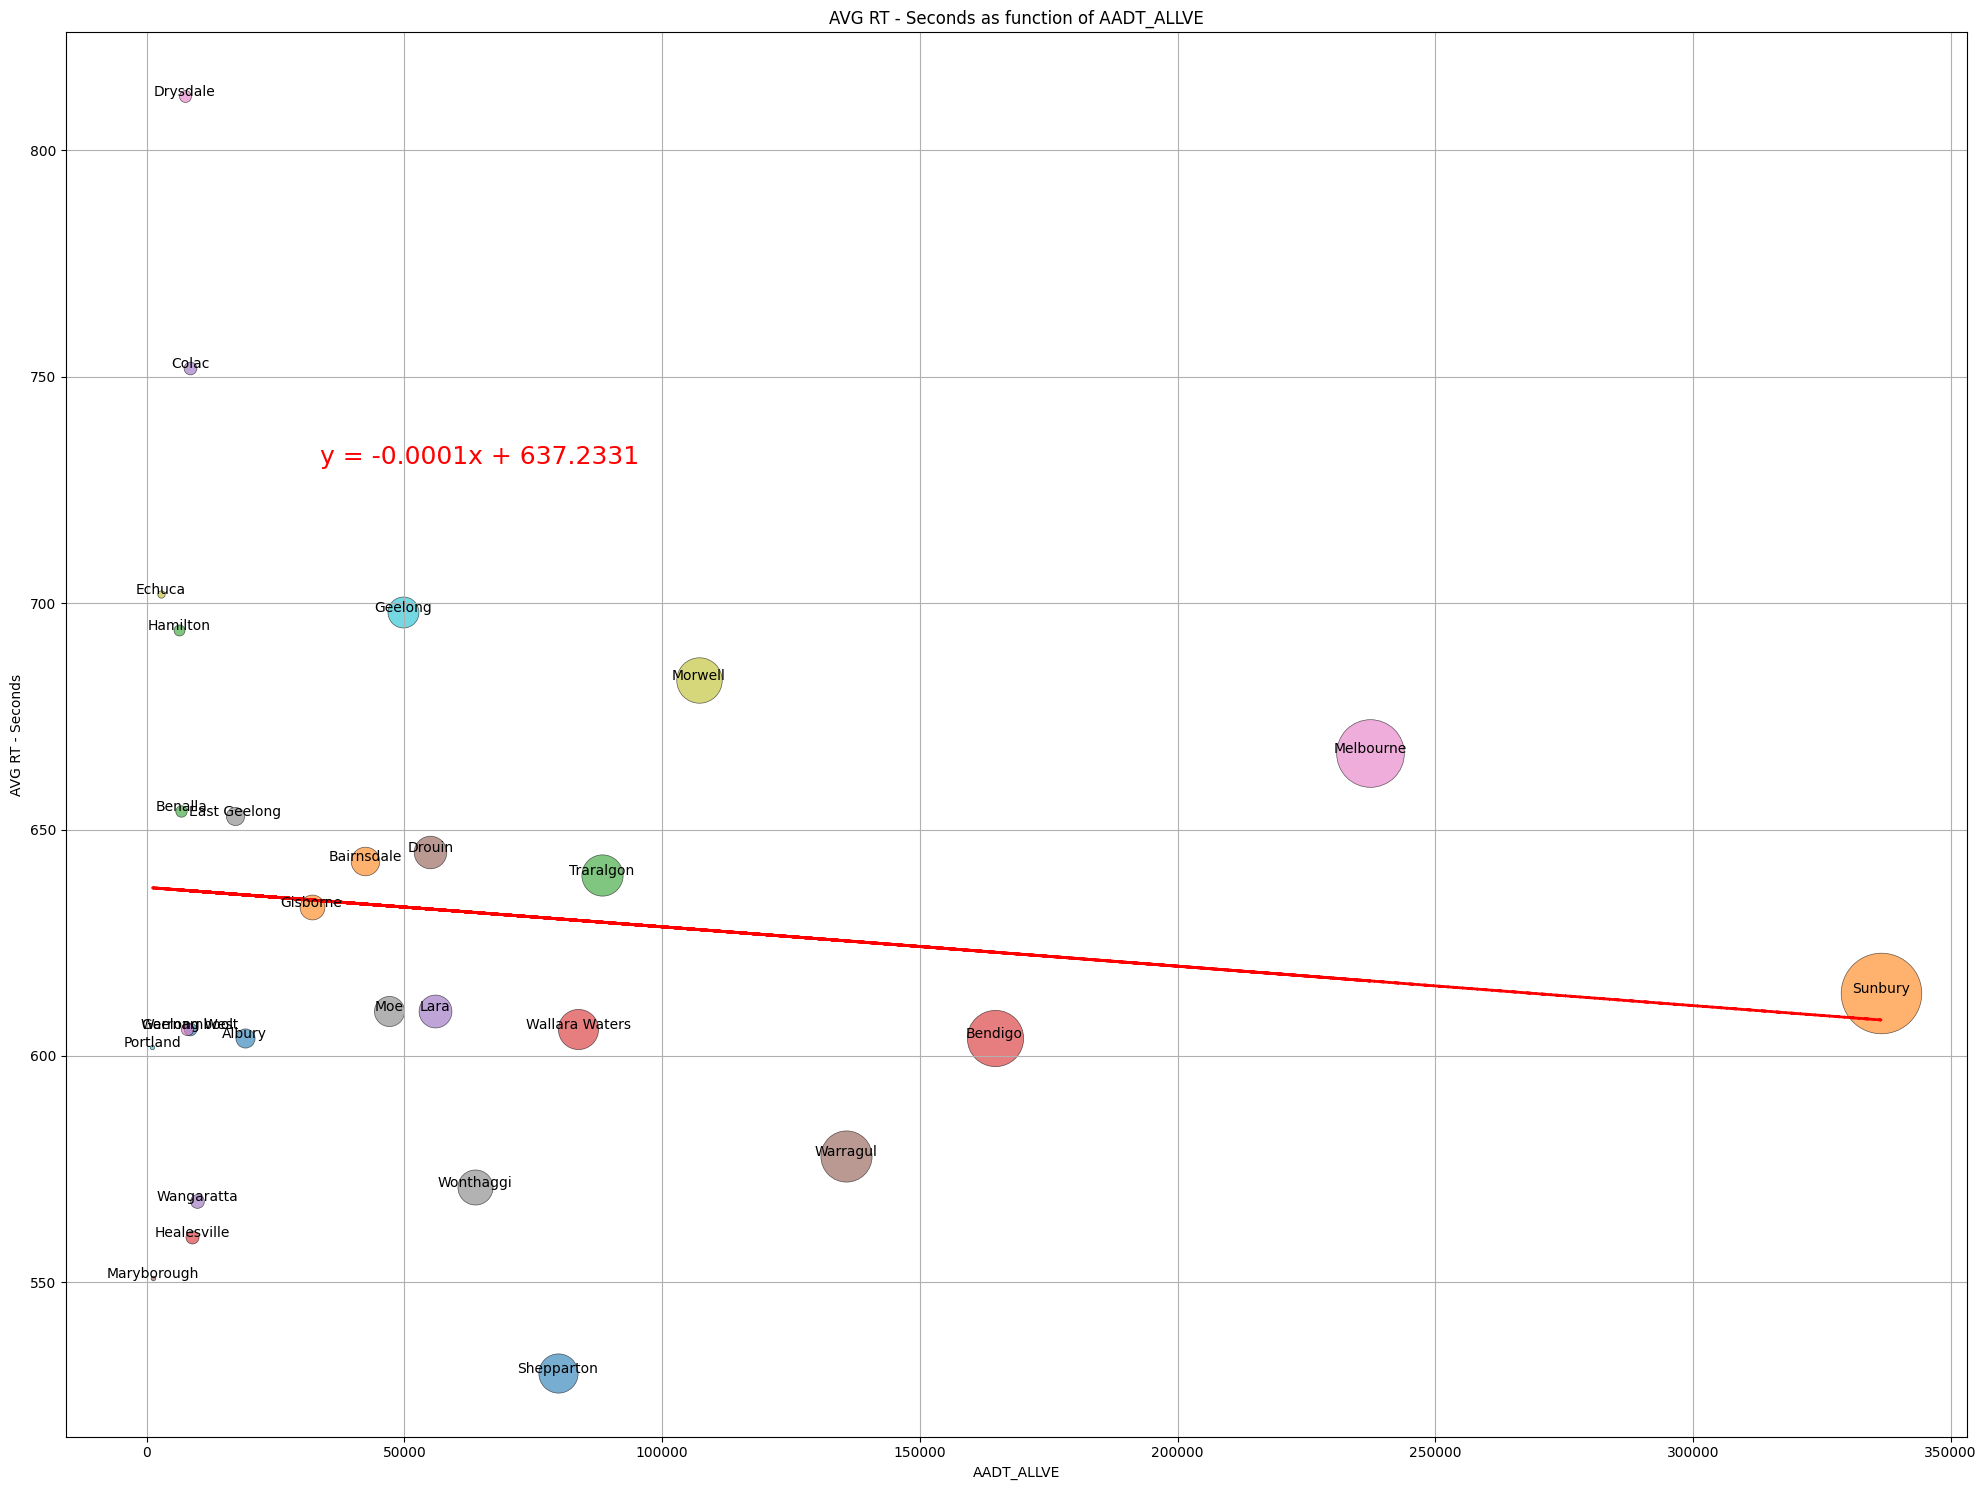

In [316]:
# Plot AVG RT - Seconds as a function of AADT_ALLVE
value = 'AVG RT - Seconds'
x = 'AADT_ALLVE'

plt.figure(figsize=(20, 15))

for i, row in merged_df.iterrows():
    bubble_size = row[x] / 100  # Scale size for visibility
    plt.scatter(row[x], row[value], 
                s=bubble_size, alpha=0.6, edgecolor='k', linewidth=0.5)
    
    # Display town name next to the bubble
    plt.text(row[x], row[value], row['town_name'], 
             fontsize=10, ha='center')
    
slope, intercept, r_value, p_value, std_err = linregress(merged_df[x], merged_df[value])
regression_line = slope * merged_df[x] + intercept

plt.plot(merged_df[x], regression_line, color='red', linestyle='--', linewidth=2, label='Regression Line')

formula_text = f"y = {slope:.4f}x + {intercept:.4f}"
plt.annotate(formula_text, xy=(0.1 * max(merged_df[x]), 0.9 * max(merged_df[value])), fontsize=18, color='red')

plt.title(f'{value} as function of {x}')
plt.xlabel(x)
plt.ylabel(value)
plt.grid(True)

plt.tight_layout()
#plt.show()
plt.savefig(f'{output_dir}/average-response-time-per-traffic-count.png')

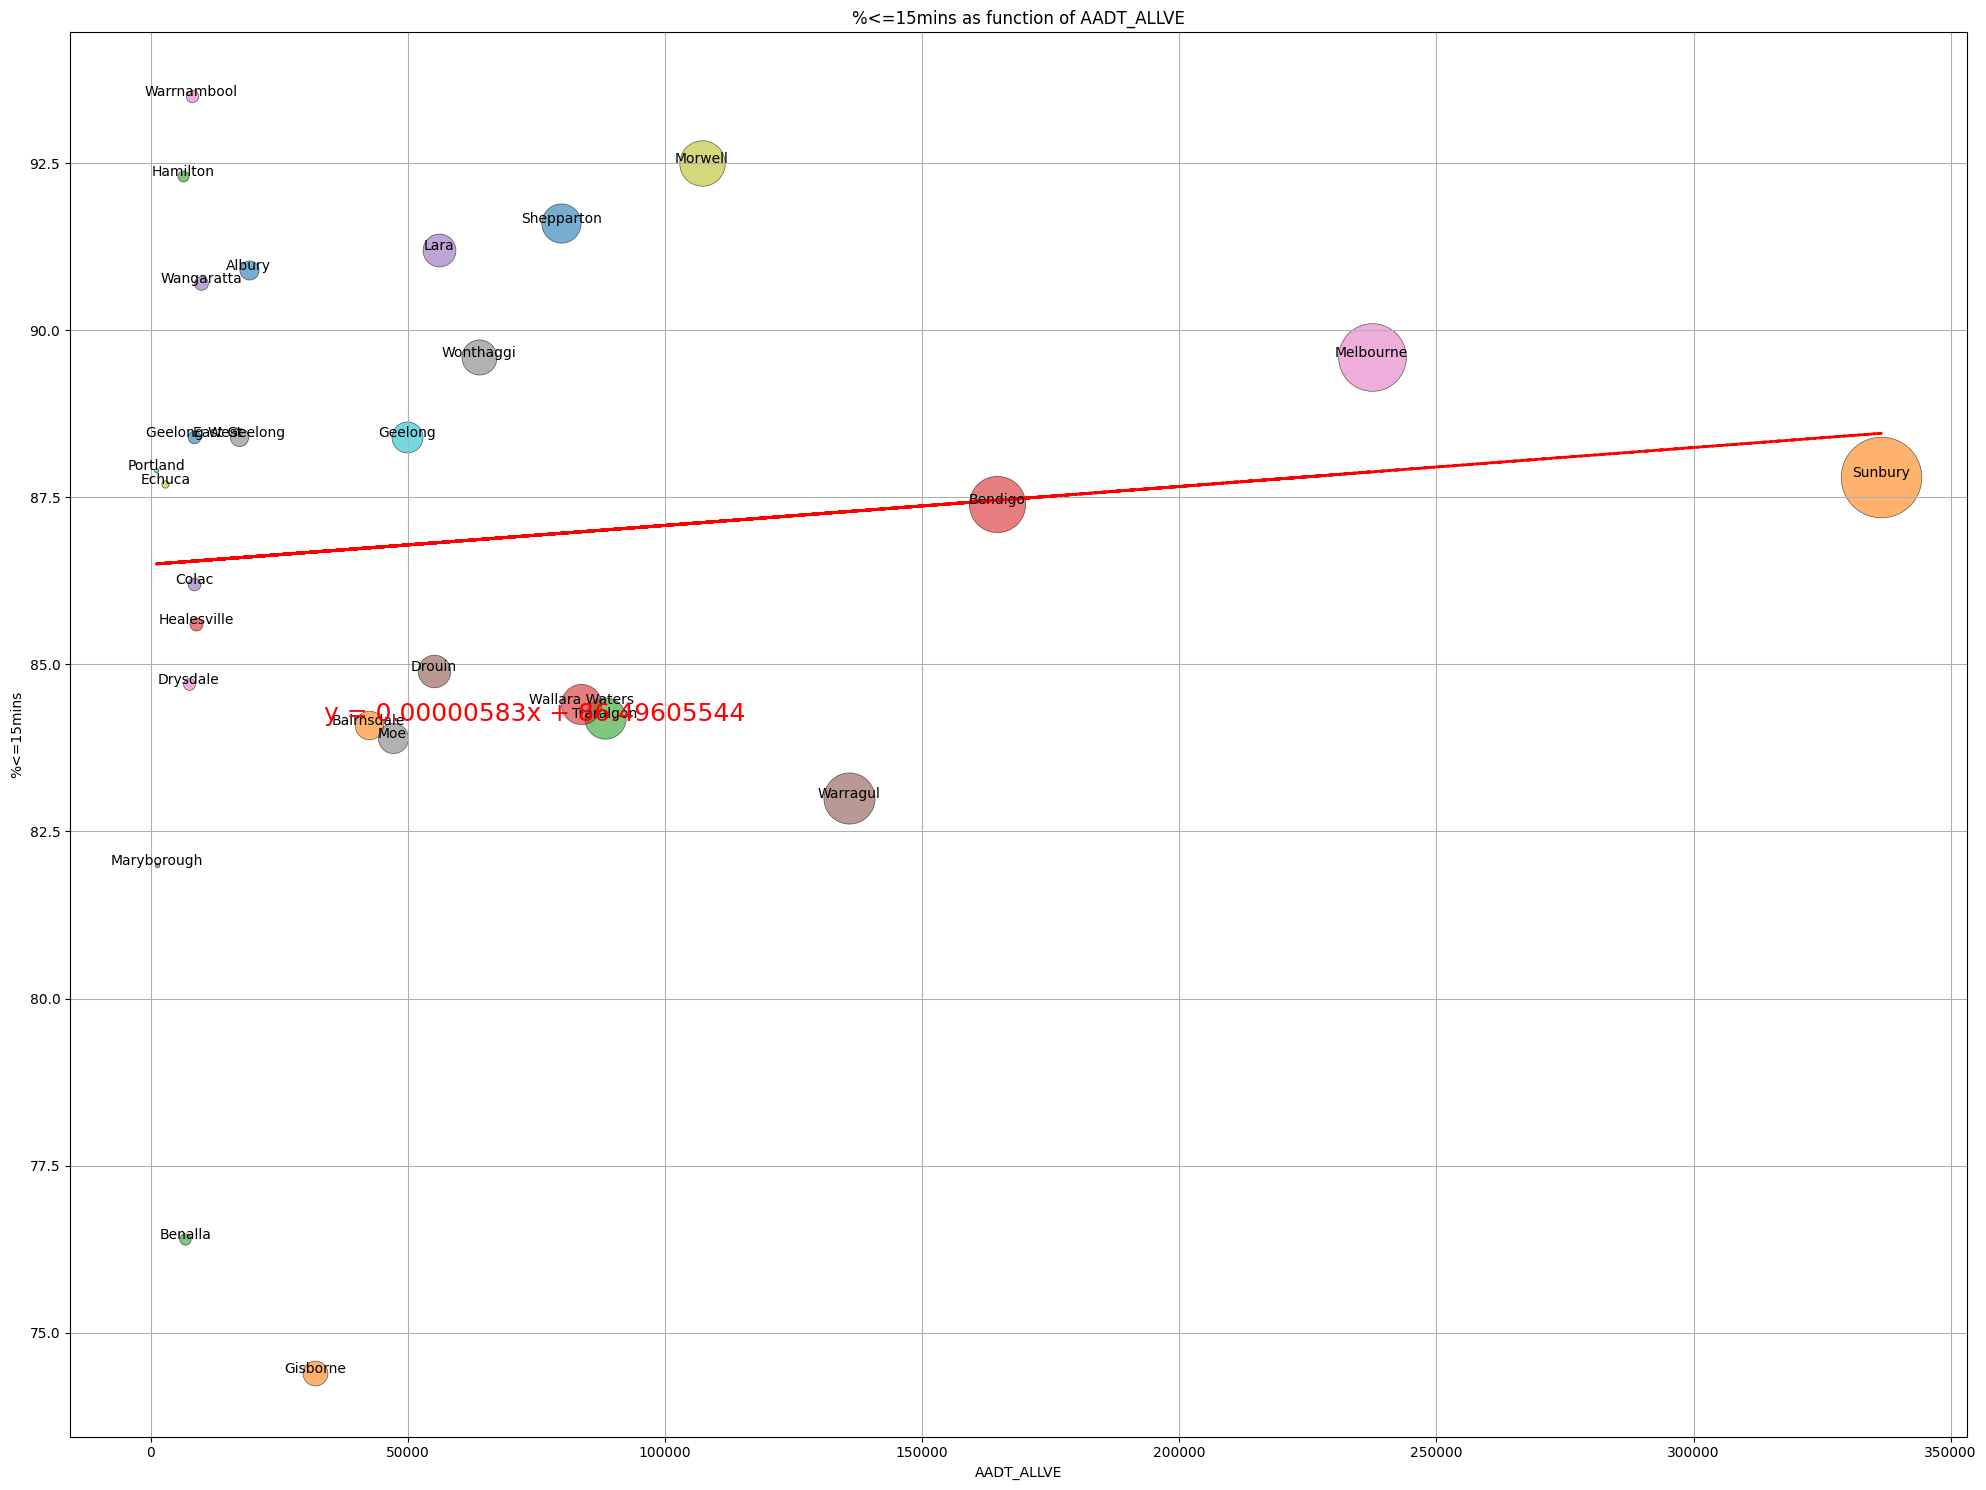

In [317]:
# Plot AVG RT - Seconds as a function of AADT_ALLVE
value = '%<=15mins'
x = 'AADT_ALLVE'

merged_df[value] = merged_df[value].str.replace('%', '').astype(float)

plt.figure(figsize=(20, 15))

for i, row in merged_df.iterrows():
    bubble_size = row[x] / 100  # Scale size for visibility
    plt.scatter(row[x], row[value], 
                s=bubble_size, alpha=0.6, edgecolor='k', linewidth=0.5)
    
    # Display town name next to the bubble
    plt.text(row[x], row[value], row['town_name'], 
             fontsize=10, ha='center')

   
slope, intercept, r_value, p_value, std_err = linregress(merged_df[x], merged_df[value])
regression_line = slope * merged_df[x] + intercept
plt.plot(merged_df[x], regression_line, color='red', linestyle='--', linewidth=2, label='Regression Line')

formula_text = f"y = {slope:.8f}x + {intercept:.8f}"
plt.annotate(formula_text, xy=(0.1 * max(merged_df[x]), 0.9 * max(merged_df[value])), fontsize=18, color='red')

plt.title(f'{value} as function of {x}')
plt.xlabel(x)
plt.ylabel(value)
plt.grid(True)

plt.tight_layout()
# plt.show()
plt.savefig(f'{output_dir}/15min-response-time-per-traffic-count.png')